<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 7 Section 1</p><br>

## 1. **Extracting twitter data:** In this problem we would like to extract data from twitter.

a. **Twitter API:** Set up twitter API using any of the methods as mentioned in the class.

In [1]:
# TODO

b. Now search twitter messages for "data science job". Display few job informations.

In [2]:
# TODO

c. Search 300 tweets using the hash tag `#chess` and save them in an object called `rTweets`. Show the top 7 sources of tweets (such as android or iphone) in a ordered bar plot.

In [3]:
# TODO

d. Convert rTweets into a data frame and store it in an object called dTweets. Display some data from dTweets.

In [4]:
# TODO 

e. dTweets has a column showing the time the tweet was created. Generate a plot showing number of tweets on each of the hours.

In [5]:
# TODO

f. Arrange the dataframe dTweets based on the retweetCount. While doing this select only columns text, screenName, retweetCount. Store the data in a object called mostTweets. Display five texts that are most retweeted.

In [6]:
# TODO

g. Generate a bar chart showing top 15 screen names and count of retweets from mostTweets. Order the bars based on the retweet counts.

In [7]:
# TODO

## 2. **Working with databases:** Please follow the instruction below before answering the questions:
* Import the sqlite3
* Connect to titanic.db

!pip install ipython-sql

In [1]:
%load_ext sql

In [2]:
%sql sqlite:///data/titanic.db

In [3]:
import seaborn as sns
import pandas as pd

In [4]:
import sqlite3

In [5]:
class DB:
    def __init__(self, db_path):
        self.conn = sqlite3.connect(db_path)
        self.curs = self.conn.cursor()
        
    def execute(self, command):
        self.curs.execute(command)
        res = self.curs.fetchall()
        return res
    
    def pandas(self, command):
        return pd.read_sql(command, self.conn)
        

In [6]:
titanicdb = DB('data/titanic.db')

a. What is the average age of passengers who survived? Group the data by Sex. Display only the column `Sex`, `AverageAge`

In [7]:
df = titanicdb.pandas('select * from titanic')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,**EMPTY**,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,**EMPTY**,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,**EMPTY**,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,**EMPTY**,S,1,1
885,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S,1,0
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,None,1,2,W./C. 6607,23.45,**EMPTY**,S,4,0
887,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C,1,0


In [8]:
df.Age.dtype

dtype('O')

In [9]:
df.Age = df.Age.astype('float')

In [10]:
df.Age.dtype

dtype('float64')

In [11]:
%sql SELECT Sex, round(AVG(age),3) as 'Average Age' FROM titanic WHERE survived=1 GROUP BY sex

 * sqlite:///data/titanic.db
Done.


Sex,Average Age
female,28.631
male,27.276


In [13]:
%%sql SELECT Sex, round(AVG(age),3) as 'Average Age' 
FROM titanic
GROUP BY sex

 * sqlite:///data/titanic.db
Done.


Sex,Average Age
female,27.745
male,30.727


In [15]:
%%sql SELECT Sex, round(AVG(age),3) as 'Average Age' 
FROM titanic
WHERE survived=1
GROUP BY sex

 * sqlite:///data/titanic.db
Done.


Sex,Average Age
female,28.631
male,27.276


In [79]:
df[df.Survived=='1'].groupby('Sex').Age.mean()

Sex
female    28.630769
male      27.276022
Name: Age, dtype: float64

In [80]:
df.groupby(['Pclass','Sex']).Survived.count()

Pclass  Sex   
1       female     92
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Survived, dtype: int64

In [81]:
df.groupby(['Pclass','Sex']).size()

Pclass  Sex   
1       female     92
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [16]:
titanicdb.execute("SELECT Sex, AVG(age) FROM titanic WHERE survived=1 GROUP BY sex")

[('female', 28.630769230769232), ('male', 27.276021505376345)]

b. What is the percentage of passengers who survived in each Passenger Class or `Pclass`? Group the data by `Sex`. Display Pclass, Sex, percentage value. 

In [16]:
titanicdb.execute(
    """SELECT PClass, Sex,
    (Count(survived)*100)/(select Count(*) from titanic group by pclass)
    FROM titanic
    GROUP BY PClass, Sex")"""

[('1', 'female', 42),
 ('1', 'male', 57),
 ('2', 'female', 35),
 ('2', 'male', 50),
 ('3', 'female', 67),
 ('3', 'male', 162)]

In [60]:
titanicdb.execute(
    """with const as (
        select Count(*) as c from titanic where survived = 1
    )
    select Count(survived)*100/c
    FROM titanic, const
    GROUP BY PClass, Sex""")

[(27,), (35,), (22,), (31,), (42,), (102,)]

In [18]:
titanicdb.execute(
    """select Count(*) from titanic group by pclass""")

[(214,), (184,), (491,)]

In [19]:
%sql select Count(*) from titanic group by pclass

 * sqlite:///data/titanic.db
Done.


Count(*)
214
184
491


In [28]:
%%sql select PClass, Sex, (select Count(*) from titanic group by PClass) / 1 FROM titanic
GROUP BY PClass, Sex

 * sqlite:///data/titanic.db
Done.


Pclass,Sex,(select Count(*) from titanic group by PClass) / 1
1,female,214
1,male,214
2,female,214
2,male,214
3,female,214
3,male,214


In [33]:
%sql SELECT Pclass,Sex, AVG(Survived)*100 FROM titanic GROUP BY Pclass, Sex

 * sqlite:///data/titanic.db
Done.


Pclass,Sex,AVG(Survived)*100
1,female,96.73913043478261
1,male,36.885245901639344
2,female,92.10526315789474
2,male,15.74074074074074
3,female,50.0
3,male,13.544668587896252


In [29]:
%%sql
SELECT PClass, Sex, Count(survived), (select Count(*) from titanic group by pclass)
FROM titanic GROUP BY PClass, Sex

 * sqlite:///data/titanic.db
Done.


Pclass,Sex,Count(survived),(select Count(*) from titanic group by pclass)
1,female,92,214
1,male,122,214
2,female,76,214
2,male,108,214
3,female,144,214
3,male,347,214


In [18]:
%sql select Count(*) from titanic group by pclass

 * sqlite:///data/titanic.db
Done.


Count(*)
214
184
491


In [19]:
%%sql 
SELECT PClass, Sex, (sum(survived)*100)/Count(survived) as "survived [%]"
FROM titanic 
GROUP BY PClass, Sex

 * sqlite:///data/titanic.db
Done.


Pclass,Sex,survived [%]
1,female,96
1,male,36
2,female,92
2,male,15
3,female,50
3,male,13


In [50]:
%%sql SELECT Pclass, Sex, 100*count(Survived)/cast(sum(count(*)) over() as float)
FROM titanic 
WHERE Survived = 1 
GROUP BY Pclass , Sex

 * sqlite:///data/titanic.db
Done.


Pclass,Sex,100*count(Survived)/cast(sum(count(*)) over() as float)
1,female,26.176470588235293
1,male,13.235294117647058
2,female,20.58823529411765
2,male,5.0
3,female,21.176470588235293
3,male,13.823529411764707


In [35]:
%%sql res << SELECT Pclass, Sex, count(Survived), sum(count(*)) over(), count(Survived) over()
FROM titanic 
WHERE Survived = 1 
GROUP BY Pclass , Sex

 * sqlite:///data/titanic.db
Done.
Returning data to local variable res


In [42]:
res = titanicdb.pandas('''SELECT Pclass, Sex, count(Survived), sum(count(*)) over(), count(Survived) over()
FROM titanic 
WHERE Survived = 1 
GROUP BY Pclass , Sex''')

In [46]:
res['count(Survived)'].sum()

340

In [53]:
%%sql res <<
with surv_table as (
    SELECT PClass, Sex, cast(count(*) over() as float) as ns FROM titanic where survived=1
)
SELECT PClass, Sex, (Count(*)*100)/ns as "Percentage of Survivors [%]"
FROM surv_table 
GROUP BY PClass, Sex

 * sqlite:///data/titanic.db
Done.
Returning data to local variable res


In [55]:
%%sql
with cons as (
    select 120 as a, 100 as b
)
select a, b from cons

 * sqlite:///data/titanic.db
Done.


a,b
120,100


In [54]:
res

PClass,Sex,Percentage of Survivors [%]
1,female,26.176470588235293
1,male,13.235294117647058
2,female,20.58823529411765
2,male,5.0
3,female,21.176470588235293
3,male,13.823529411764707


In [65]:
res = pd.DataFrame(res)
res.sum()

PClass                                                 112233
Sex                            femalemalefemalemalefemalemale
Percentage of Survivors [%]                             100.0
dtype: object

In [66]:
res

,PClass,Sex,Percentage of Survivors [%]
0,1,female,26.176471
1,1,male,13.235294
2,2,female,20.588235
3,2,male,5.000000
4,3,female,21.176471
5,3,male,13.823529


In [108]:
a = df.groupby(['Pclass','Sex']).Survived.count()/df.Pclass.count()
a

Pclass  Sex   
1       female    0.103487
        male      0.137233
2       female    0.085489
        male      0.121485
3       female    0.161980
        male      0.390326
Name: Survived, dtype: float64

In [109]:
a.sum()

1.0

In [111]:
df.Survived = df.Survived.astype('int')

In [112]:
a = df.groupby(['Pclass','Sex']).Survived.sum()/df.Pclass.count()
a

Pclass  Sex   
1       female    0.100112
        male      0.050619
2       female    0.078740
        male      0.019123
3       female    0.080990
        male      0.052868
Name: Survived, dtype: float64

In [113]:
a.sum()

0.3824521934758155

c. What is the average age of all the passenger (survived and not survived)? Group the data by `Pclass`, `Sex`, `Survived`. After that use `seaborn` to generate a line plot to show average age vs pclass, facet by sex and color it by survived.

In [20]:
%sql result << SELECT  PClass, Sex, survived,AVG(age) FROM titanic GROUP BY PClass, Sex, survived

 * sqlite:///data/titanic.db
Done.
Returning data to local variable result


In [21]:
result

Pclass,Sex,Survived,AVG(age)
1,female,0,25.666666666666668
1,female,1,34.5625
1,male,0,44.58196721311475
1,male,1,36.248000000000005
2,female,0,36.0
2,female,1,28.080882352941178
2,male,0,33.36904761904762
2,male,1,16.022
3,female,0,23.818181818181817
3,female,1,19.329787234042552


In [22]:
type(result)

sql.run.ResultSet

In [23]:
table = pd.DataFrame(result)
table

,Pclass,Sex,Survived,AVG(age)
0,1,female,0,25.666667
1,1,female,1,34.562500
2,1,male,0,44.581967
3,1,male,1,36.248000
4,2,female,0,36.000000
5,2,female,1,28.080882
6,2,male,0,33.369048
7,2,male,1,16.022000
8,3,female,0,23.818182
9,3,female,1,19.329787


In [24]:
result = titanicdb.execute("SELECT  PClass, Sex, survived,AVG(age) FROM titanic GROUP BY PClass, Sex, survived")
result

[('1', 'female', '0', 25.666666666666668),
 ('1', 'female', '1', 34.5625),
 ('1', 'male', '0', 44.58196721311475),
 ('1', 'male', '1', 36.248000000000005),
 ('2', 'female', '0', 36.0),
 ('2', 'female', '1', 28.080882352941178),
 ('2', 'male', '0', 33.36904761904762),
 ('2', 'male', '1', 16.022),
 ('3', 'female', '0', 23.818181818181817),
 ('3', 'female', '1', 19.329787234042552),
 ('3', 'male', '0', 27.25581395348837),
 ('3', 'male', '1', 22.274210526315787)]

In [25]:
pd.DataFrame(result)

,0,1,2,3
0,1,female,0,25.666667
1,1,female,1,34.562500
2,1,male,0,44.581967
3,1,male,1,36.248000
4,2,female,0,36.000000
5,2,female,1,28.080882
6,2,male,0,33.369048
7,2,male,1,16.022000
8,3,female,0,23.818182
9,3,female,1,19.329787


In [26]:
table = titanicdb.pandas("SELECT  PClass, Sex, survived,AVG(age) FROM titanic GROUP BY PClass, Sex, survived")
table

,Pclass,Sex,Survived,AVG(age)
0,1,female,0,25.666667
1,1,female,1,34.562500
2,1,male,0,44.581967
3,1,male,1,36.248000
4,2,female,0,36.000000
5,2,female,1,28.080882
6,2,male,0,33.369048
7,2,male,1,16.022000
8,3,female,0,23.818182
9,3,female,1,19.329787


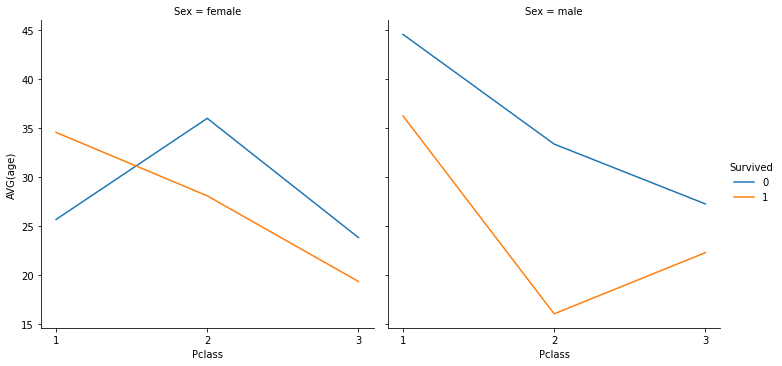

In [28]:
ax = sns.relplot(data=table, x='Pclass', y='AVG(age)', hue='Survived', col='Sex', kind='line')

d. What is the name, age, sex and pclass of the 5 oldest and 5 youngest persons who died?

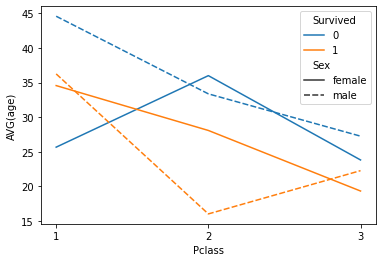

In [38]:
ax = sns.lineplot(x="Pclass", y="AVG(age)",
             hue="Survived", style="Sex",
             data=table)

In [29]:
titanicdb.execute("SELECT  name, age, sex, pclass FROM titanic order by CAST(age as insigned) DESC limit 5")

[('Barkworth, Mr. Algernon Henry Wilson', '80', 'male', '1'),
 ('Svensson, Mr. Johan', '74', 'male', '3'),
 ('Goldschmidt, Mr. George B', '71', 'male', '1'),
 ('Artagaveytia, Mr. Ramon', '71', 'male', '1'),
 ('Connors, Mr. Patrick', '70.5', 'male', '3')]

In [30]:
titanicdb.execute("SELECT  name, age, sex, pclass FROM titanic where age is not NULL order by  CAST(age as insigned) ASC limit 5")

[('Thomas, Master. Assad Alexander', '0.42', 'male', '3'),
 ('Hamalainen, Master. Viljo', '0.67', 'male', '2'),
 ('Baclini, Miss. Helene Barbara', '0.75', 'female', '3'),
 ('Baclini, Miss. Eugenie', '0.75', 'female', '3'),
 ('Caldwell, Master. Alden Gates', '0.83', 'male', '2')]

In [69]:
%sql SELECT  min(cast(age as FLOAT)), min(age), min(cast(age as insigned)) from titanic

 * sqlite:///data/titanic.db
Done.


min(cast(age as FLOAT)),min(age),min(cast(age as insigned))
0.42,0.42,0.42


In [70]:
%sql SELECT  min(cast(age as FLOAT)), min(age), min(cast(age as insigned)) from titanic where Survived=0

 * sqlite:///data/titanic.db
Done.


min(cast(age as FLOAT)),min(age),min(cast(age as insigned))
1.0,1,1


In [31]:
%%sql with died as (SELECT  name, cast(age as FLOAT) as age, sex, pclass FROM titanic where Survived=0 and age notnull),
a as (SELECT  * FROM died order by age DESC limit 5),
b as (SELECT  * FROM died order by age ASC  limit 5)
select * from a
UNION
select * from b
order by age

 * sqlite:///data/titanic.db
Done.


name,age,sex,pclass
"Goodwin, Master. Sidney Leonard",1.0,male,3
"Panula, Master. Eino Viljami",1.0,male,3
"Andersson, Miss. Ellis Anna Maria",2.0,female,3
"Palsson, Master. Gosta Leonard",2.0,male,3
"Rice, Master. Eugene",2.0,male,3
"Mitchell, Mr. Henry Michael",70.0,male,2
"Connors, Mr. Patrick",70.5,male,3
"Artagaveytia, Mr. Ramon",71.0,male,1
"Goldschmidt, Mr. George B",71.0,male,1
"Svensson, Mr. Johan",74.0,male,3


In [40]:
%sql SELECT Name,Pclass,Sex,Survived, Age, Max(Age) FROM titanic GROUP BY Survived,Pclass, Sex

 * sqlite:///data/titanic.db
Done.


Name,Pclass,Sex,Survived,Age,Max(Age)
"Isham, Miss. Ann Elizabeth",1,female,0,50,50
"Goldschmidt, Mr. George B",1,male,0,71,71
"Mack, Mrs. (Mary)",2,female,0,57,57
"Mitchell, Mr. Henry Michael",2,male,0,70,70
"Ford, Miss. Robina Maggie ""Ruby""",3,female,0,9,9
"Asplund, Master. Clarence Gustaf Hugo",3,male,0,9,9
"Andrews, Miss. Kornelia Theodosia",1,female,1,63,63
"Barkworth, Mr. Algernon Henry Wilson",1,male,1,80,80
"Collyer, Miss. Marjorie ""Lottie""",2,female,1,8,8
"Davies, Master. John Morgan Jr",2,male,1,8,8


In [44]:
%sql SELECT name, Pclass,Sex,Survived, Age, Min(Age), Max(Age) FROM titanic GROUP BY Survived,Pclass, Sex

 * sqlite:///data/titanic.db
Done.


Name,Pclass,Sex,Survived,Age,Min(Age),Max(Age)
"Isham, Miss. Ann Elizabeth",1,female,0,50,2,50
"Goldschmidt, Mr. George B",1,male,0,71,18,71
"Mack, Mrs. (Mary)",2,female,0,57,24,57
"Mitchell, Mr. Henry Michael",2,male,0,70,16,70
"Ford, Miss. Robina Maggie ""Ruby""",3,female,0,9,10,9
"Asplund, Master. Clarence Gustaf Hugo",3,male,0,9,1,9
"Andrews, Miss. Kornelia Theodosia",1,female,1,63,14,63
"Barkworth, Mr. Algernon Henry Wilson",1,male,1,80,0.92,80
"Collyer, Miss. Marjorie ""Lottie""",2,female,1,8,13,8
"Davies, Master. John Morgan Jr",2,male,1,8,0.67,8


In [43]:
%sql SELECT name, Pclass,Sex,Survived, Age, Max(Age), Min(Age) FROM titanic GROUP BY Survived,Pclass, Sex

 * sqlite:///data/titanic.db
Done.


Name,Pclass,Sex,Survived,Age,Max(Age),Min(Age)
"Allison, Miss. Helen Loraine",1,female,0,2,50,2
"Penasco y Castellana, Mr. Victor de Satode",1,male,0,18,71,18
"Yrois, Miss. Henriette (""Mrs Harbeck"")",2,female,0,24,57,24
"Gaskell, Mr. Alfred",2,male,0,16,70,16
"Van Impe, Miss. Catharina",3,female,0,10,9,10
"Panula, Master. Eino Viljami",3,male,0,1,9,1
"Carter, Miss. Lucile Polk",1,female,1,14,63,14
"Allison, Master. Hudson Trevor",1,male,1,0.92,80,0.92
"Mellinger, Miss. Madeleine Violet",2,female,1,13,8,13
"Hamalainen, Master. Viljo",2,male,1,0.67,8,0.67


In [42]:
%sql SELECT Pclass,Sex,Survived, Max(Age), Min(Age) FROM titanic GROUP BY Survived,Pclass, Sex

 * sqlite:///data/titanic.db
Done.


Pclass,Sex,Survived,Max(Age),Min(Age)
1,female,0,50,2
1,male,0,71,18
2,female,0,57,24
2,male,0,70,16
3,female,0,9,10
3,male,0,9,1
1,female,1,63,14
1,male,1,80,0.92
2,female,1,8,13
2,male,1,8,0.67


e. On average which Passenger Class is more expensive?

In [32]:
%sql SELECT pclass,avg(fare) FROM titanic group by pclass order by avg(fare) desc --limit 1

 * sqlite:///data/titanic.db
Done.


Pclass,avg(fare)
1,84.19351635514012
2,20.66218315217391
3,13.675550101832997
